# 无限大功率电源三相短路电流分析

无限大电源：电源功率无限大，电压和频率保持恒定，内阻为0. 若电压源内阻抗小于电路阻抗的10%，即可认为是无限大电源。

暂态过程：分两个回路。左边回路因阻抗减小会产生大电流。$t=0$时刻有微分方程：

$L\frac{di_{a}}{dt}+Ri_{a}=U_{m}sin(\omega t+\alpha)$

特解:稳态分量：$I_{m}sin(\omega t+a-f)$

齐次解：$Ce^{-t/Ta}$

$C=I_{m0}sin(a-f0)-I_{m}sin(a-f)$

In [109]:
from math import sin,exp,sqrt,atan,pi
import numpy as np
import matplotlib.pyplot as plt
Z=0.1+1.46j
Z2=1000+2000j
Um=1
#a=pi/3

def mod(z):
    return sqrt(z.real**2+z.imag**2)
omega=2*pi*50
Im0=Um/mod(Z2+Z)
f0=atan((Z2+Z).imag/(Z2+Z).real)
f=atan(Z.imag/Z.real)
Im=Um/mod(Z)
C=lambda a: Im0*sin(a-f0)-Im*sin(a-f)
Ta=(Z.imag/omega)/Z.real
sx1=lambda  a,t: Im*np.sin(omega*t+a-f)
sx2=lambda  a,t: C(a)*np.exp(-1*t/Ta)
sxdl=lambda  a,t: sx1(a,t)+sx2(a,t)

In [110]:
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

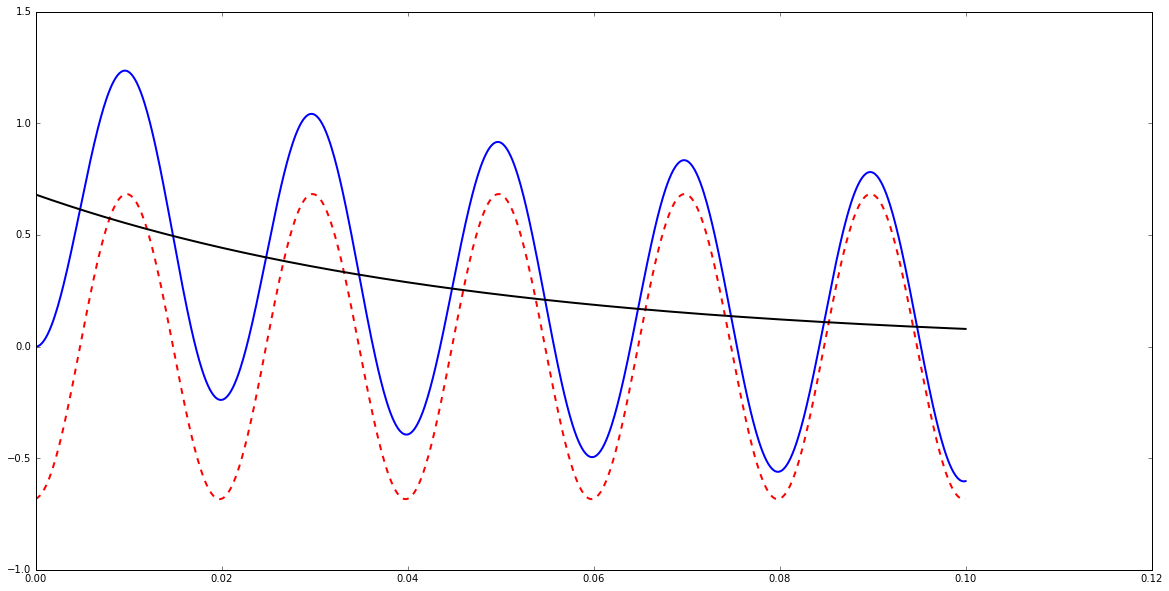

In [111]:
%matplotlib inline
def draw(a):
    t = np.linspace(0, 0.1 ,1000)
    y=sxdl(a,t)
    plt.figure(figsize=(20,10))
    plt.plot(t,y,label="$I_{a}$",color="blue",linewidth=2)
    plt.plot(t,sx1(a,t),label="$I_{pa}$",color="red",linewidth=2,linestyle="--")
    plt.plot(t,sx2(a,t),label="$I_{\alpha a}$",color="black",linewidth=2)
w = interactive(draw, a=(0,pi))
display(w)